# Customer Segmentation using Clustering Analysis

Mr Ken is a supermarket owner who wants to understand his customers to know who can easily converge [Target Customers] so that the sense can be given to the marketing team and plan the strategy accordingly.

Through membership cards, he has some basic data about his customers like Customer ID, age, gender, annual income and spending score. Spending Score is something he assigns to the customer based on defined parameters like customer behavior and purchasing data.

The task of this notebook is to develop a clustering algorith to help him (Mr. Ken) create target groups for his customers. This woul help him know what age to target which product. As well as what kind of offers to use on which customers during his marketing runs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('Mall_Customers.csv')

In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
data.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score']

In [11]:
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

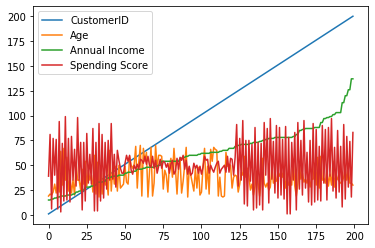

In [12]:
data.plot()

## Observations
 
The income of customers is increasing. The age is distributed. The spending score is two-edged. A sparse spread at the beginning (0 to 40) and another spread at the end (60 to 100).

## Univariate Analysis

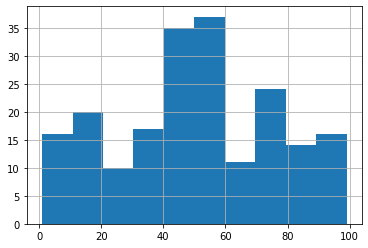

In [13]:
data['Spending Score'].hist()

THe highest spending score is between 40 to 60.

Text(0.5, 0, 'Spending Score')

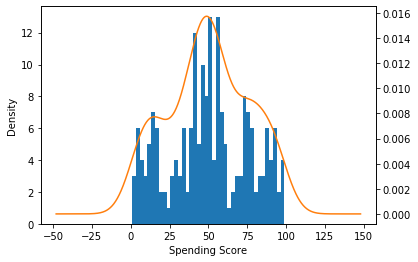

In [14]:
ax = data['Spending Score'].plot(kind='hist', bins=40)
data['Spending Score'].plot(kind='kde', ax=ax, secondary_y=True)
ax.set_xlabel('Spending Score')

 The spending score follows a normal distribution.

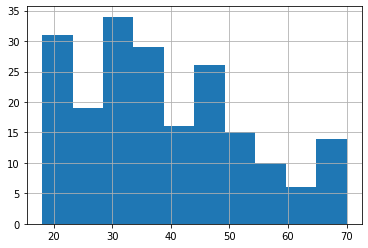

In [12]:
data['Age'].hist()

Stores top customers are between 18 and 50 years old. With more people

Text(0.5, 0, 'Age')

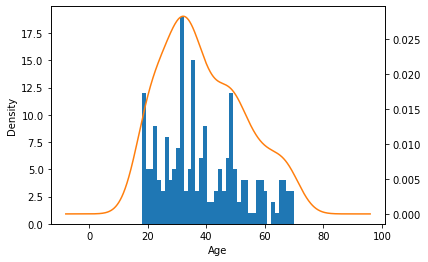

In [13]:
ax = data['Age'].plot(kind='hist', bins=40)
data['Age'].plot(kind='kde', ax=ax, secondary_y=True)
ax.set_xlabel('Age')

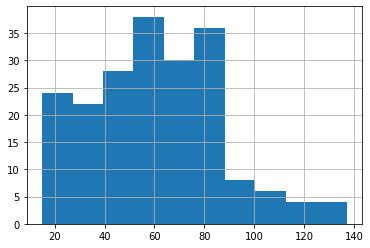

In [14]:
data['Annual Income'].hist()

Highest income between 50,000 to 85,000 dollars

## Multivariate plot

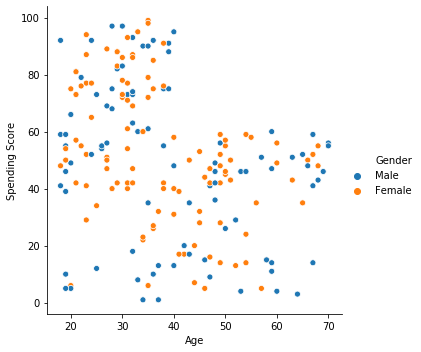

In [15]:
# plot age vs spending score, hue is gender
sns.relplot(x="Age", y="Spending Score", hue="Gender", data=data);

The spending seems to be spread across all gender. So there is no gender gap amongst the store customers. However, the spending score tends to be higher for age < 40.
Thus, the ages 18 to 40 has a better spending score (than above 60).

A technical view of the segments using the human eye:
* 18 to 40
* 30 to 55
* 55 to 70

It can be said that the customers between the ages 18 to 40 have the highest purchasing power in the store. However, looking at the range of people withing the demographics, more info is required to know how best to target each segment created so far based on the type of commodities bought.

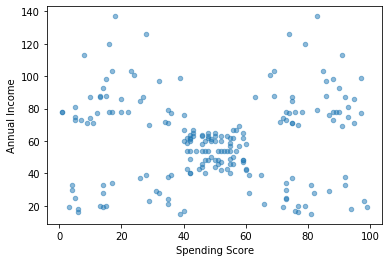

In [25]:
data.plot(kind="scatter", y="Annual Income", x="Spending Score", alpha=0.5)

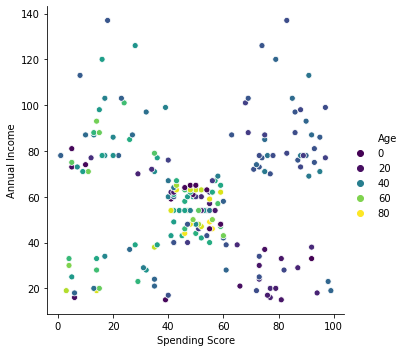

In [26]:
# plot spending score vs annual income, hue is Age
sns.relplot(x="Spending Score", y="Annual Income", hue="Age", data=data, palette="viridis")

Based on income vs spendign score:
* The spending score of 18 to 40 are those earning between 0 to 40 and 70 to 140
* The spending score between 40 to 60 is from those earning between 40 to 70 in income.
* Spending score 60 to 100 goes to those who earn just like those in 0 to 40.

The highest spending score is between 40 to 60. That region is a representative of all the age groups.

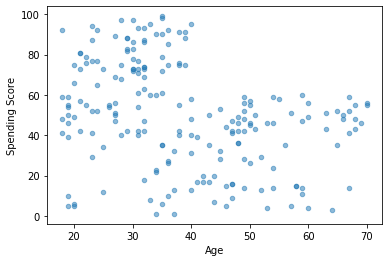

In [27]:
data.plot(kind="scatter", x="Age", y="Spending Score", alpha=0.5)

## Correlation Matrix to further understand our attributes

In [15]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female':0})

In [16]:
data.corr()

,CustomerID,Gender,Age,Annual Income,Spending Score
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income,0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score,0.013835,-0.058109,-0.327227,0.009903,1.000000


Age impacts all. The higher the age, the lesser the annual income and spending score.

The customer ID increases with income so, we can safely go with annual income and leave customer ID.

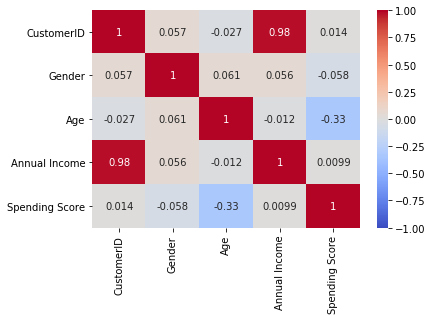

In [17]:
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

## Miscellaneous

In [18]:
data[data['Age'].between (18,40)]['Spending Score'].count()

122

In [19]:
data[data['Age'].between (18,40)]['Spending Score'].sum()

7234

In [20]:
data[data['Age'].between (41,60)]['Spending Score'].count()

61

In [21]:
data[data['Age'].between (41,60)]['Spending Score'].sum()

2055

In [22]:
data[data['Age'] > 60]['Spending Score'].count()

17

In [23]:
data[data['Age'] > 60]['Spending Score'].sum()

751

## Clustering Analysis

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
X = data.iloc[:, 1:]

In [26]:
sc = StandardScaler()
sc_X = sc.fit_transform(X)

In [27]:
# Make k-means clusterer
cluster = KMeans(n_clusters=5, max_iter=600, random_state=1)

# Fit clusterer
cluster.fit(sc_X)

KMeans(max_iter=600, n_clusters=5, random_state=1)

In [28]:
# Observing the outputs and cluster performance
cluster.labels_

array([4, 4, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 4, 2, 4, 3, 1, 3, 4,
       2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 3, 4, 2, 1, 2, 1, 2, 1, 2, 4, 3, 1,
       2, 1, 2, 1, 1, 1, 2, 4, 1, 3, 2, 3, 2, 3, 1, 3, 3, 4, 2, 2, 3, 4,
       2, 2, 4, 1, 3, 2, 2, 2, 3, 4, 2, 3, 1, 2, 3, 4, 3, 2, 1, 3, 2, 1,
       1, 2, 2, 4, 3, 2, 1, 4, 2, 1, 3, 4, 1, 2, 3, 4, 3, 1, 2, 3, 3, 3,
       3, 1, 2, 4, 1, 1, 2, 2, 2, 2, 4, 2, 1, 4, 1, 1, 3, 4, 3, 4, 0, 4,
       1, 1, 0, 1, 2, 4, 0, 1, 2, 4, 1, 1, 0, 4, 3, 1, 2, 4, 0, 4, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 4, 0, 4, 0, 4, 2, 1,
       0, 4, 0, 4, 0, 1, 0, 1, 2, 4, 2, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 4])

In [29]:
cluster.cluster_centers_

array([[ 0.67029819, -0.03490471,  1.21566162, -1.39298818],
       [-0.88640526, -0.75047453, -0.00501655,  0.6979562 ],
       [-0.88640526,  0.69184496, -0.28856088, -0.55050496],
       [ 1.12815215,  1.22385356, -0.4498575 , -0.44231533],
       [ 1.12815215, -0.76072691,  0.05496398,  0.83369302]])

In [30]:
y_cluster = cluster.predict(X)

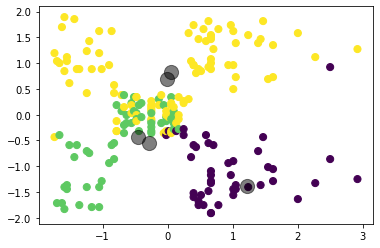

In [35]:
# plotting annual income vs spending score
plt.scatter(sc_X[:, 2], sc_X[:, 3], c=y_cluster, s=50, cmap='viridis')

centers = cluster.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5);

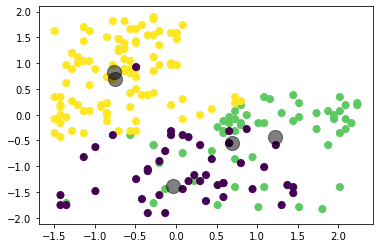

In [36]:
# visualising age vs spending score
plt.scatter(sc_X[:, 1], sc_X[:, 3], c=y_cluster, s=50, cmap='viridis')

centers = cluster.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 3], c='black', s=200, alpha=0.5);

The model tried capturing a 3-clustered age vs spending score here. This visualisation comforms with the eye test but contradicts the cluster centres. Thus, in the future the algorithm might become problematic.

Scaling gave our model a poor performance so we tried clustering using other models (SpectralClustering and GaussianMixtures) with and without scaling and they all turned out better without scaling. The best of our model thus came without the scaling component.

In [37]:
silhouette_score(sc_X, cluster.labels_)

0.3170368039556075

## One more KMeans without scaling

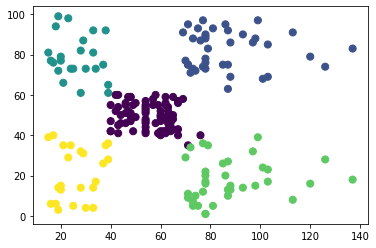

In [39]:
kmeans = KMeans(n_clusters=5, max_iter=600, random_state=1)
km = kmeans.fit(X)
yk = km.predict(X)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=yk, s=50, cmap='viridis')

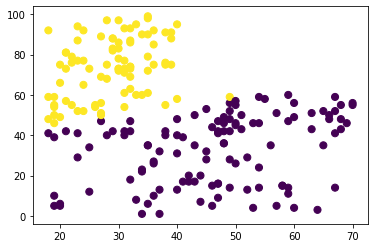

In [40]:
kmeans = KMeans(n_clusters=2, max_iter=600, random_state=1)
km1 = kmeans.fit(X)
yk1 = km1.predict(X)
plt.scatter(X.iloc[:, 1], X.iloc[:, 3], c=yk1, s=50, cmap='viridis')

In [41]:
silhouette_score(X, km.labels_)

0.4440669204743008

In [42]:
silhouette_score(X, km1.labels_)

0.29307334005502633

# This is where the official road ends.
Afterthoughts:
* How do all these impact a real business?
* How can this be useful to the store owner?
* How do you make new predictions in the future?